In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt

In [2]:
fdf = pd.read_csv("D:\DATA_Science\DATASET\WEEK05_AdvancedAnalytics\data_member.csv", index_col=0)
fdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590565 entries, 0 to 590564
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ent              590565 non-null  object
 1   original_status  590565 non-null  object
 2   join_month       590565 non-null  int64 
 3   join_year        590565 non-null  int64 
 4   sponsor          590565 non-null  object
dtypes: int64(2), object(3)
memory usage: 27.0+ MB


In [3]:
t21_df = pd.read_csv("D:\DATA_Science\DATASET\WEEK05_AdvancedAnalytics\\new_transaction 2021.csv", index_col=0)
t22_df = pd.read_csv("D:\DATA_Science\DATASET\WEEK05_AdvancedAnalytics\\new_transaction 2022.csv", index_col=0)
t23_df = pd.read_csv("D:\DATA_Science\DATASET\WEEK05_AdvancedAnalytics\\new_transaction 2023.csv", index_col=0)

tall_df = pd.concat([t21_df,t22_df,t23_df])
tall_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4129114 entries, 0 to 643128
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   payment_date       object 
 1   ent                object 
 2   center             object 
 3   total_amount       float64
 4   discount           float64
 5   paid_amount        int64  
 6   trans_origin_type  object 
 7   product            object 
 8   qty                int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 315.0+ MB


In [4]:
ff = pd.read_csv('D:\DATA_Science\DATASET\WEEK05_AdvancedAnalytics\\transaction 2021.csv', index_col=0)
ff1 = pd.read_csv('D:\DATA_Science\DATASET\WEEK05_AdvancedAnalytics\\transaction 2022.csv', index_col=0)
ff2 = pd.read_csv('D:\DATA_Science\DATASET\WEEK05_AdvancedAnalytics\\transaction 2023.csv', index_col=0)

o_df = pd.concat([ff,ff1,ff2])
o_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2406316 entries, 0 to 362108
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   payment_date       object 
 1   ent                object 
 2   center             object 
 3   product_json       object 
 4   total_amount       float64
 5   discount           float64
 6   paid_amount        int64  
 7   trans_origin_type  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 165.2+ MB


# STEP 1
- Clean DATA

In [5]:
fdf['join'] = pd.to_datetime(fdf['join_year'].astype(str) + '/' + fdf['join_month'].astype(str) + '/01')
fdf = fdf.loc[:,['ent','original_status','sponsor','join']]
fdf['mem_duration(months)'] = round((dt.datetime(2023, 7, 1)-fdf['join'])/np.timedelta64(1, 'M'))

fdf

,ent,original_status,sponsor,join,mem_duration(months)
0,UCC4CC4F,-,8844CQCEY,2014-05-01,110.0
1,UCC4CCEK,-,8844CQCCU,2014-05-01,110.0
2,UCC4CC15,-,8844CQCEY,2014-05-01,110.0
3,UCC4CCR2,-,8844CQCEY,2014-05-01,110.0
4,UCC4CCJP,-,8844CQCEY,2014-05-01,110.0
...,...,...,...,...,...
590560,H3CCC43B,A,H3CCC4R2,2010-07-01,156.0
590561,H3CCC4ZY,A,H3CCC4JP,2010-06-01,157.0
590562,H3CCCEC7,A,H3CCC4JP,2010-07-01,156.0
590563,H3CCCE4I,A,H3CCC4JP,2010-07-01,156.0


In [6]:
# Change Date format
tall_df['payment_date'] = pd.to_datetime(tall_df['payment_date'], format='%Y-%m-%d %H:%M:%S')
tall_df['payment_date'] = pd.to_datetime( tall_df['payment_date'].dt.to_period('M').astype(str) )

o_df['payment_date'] = pd.to_datetime(o_df['payment_date'], format='%Y-%m-%d %H:%M:%S')
o_df['payment_date'] = pd.to_datetime( o_df['payment_date'].dt.to_period('M').astype(str) )

tall_df

,payment_date,ent,center,total_amount,discount,paid_amount,trans_origin_type,product,qty
0,2021-01-01,TCC43RQQZ3B,TKC4CJ,1627000.0,0.0,0,online,1ECZ,1
1,2021-01-01,TCC43RQQZ3B,TKC4CJ,1627000.0,0.0,0,online,8CEC4Q,1
2,2021-01-01,TCC4Q4JZ4Q0,TKCEWQ,594000.0,0.0,0,online,4E4W,2
3,2021-01-01,TCC4Q4JZ4Q0,TKCEWQ,594000.0,0.0,0,online,DC4CC4,1
4,2021-01-01,TCC4RJ11QE7,TKC14E,468000.0,0.0,0,online,IC4CC4,1
...,...,...,...,...,...,...,...,...,...
643124,2023-07-01,TCCEREZCC10,TKC1Z4,2500.0,NaN,2500,offline,KCQCEJ,1
643125,2023-07-01,TCCEQ1RJ3JY,TKC1Z4,2500.0,NaN,2500,offline,KCQCEJ,1
643126,2023-07-01,TCCEQ4Z4R4Y,TKC1Z4,2500.0,NaN,2500,offline,KCQCEJ,1
643127,2023-07-01,TCCEQEZJQ4F,TKC1Z4,2500.0,NaN,2500,offline,KCQCER,1


- Transform

In [7]:
# Prepare Columns

j0 = pd.DataFrame(tall_df.groupby(by=['ent'])['total_amount'].apply(lambda x: x.sum()))
j1 = pd.DataFrame(tall_df.loc[tall_df['payment_date'] > dt.datetime(2023, 4, 1)
                                     ].groupby(by=['ent'])['total_amount'].apply(lambda x: x.sum())
                                     ).rename(columns={'total_amount':'total_last_3m'})                       
j2 = pd.DataFrame(tall_df.loc[tall_df['payment_date'] > dt.datetime(2023, 1, 1)
                                     ].groupby(by=['ent'])['total_amount'].apply(lambda x: x.sum())
                                     ).rename(columns={'total_amount':'total_last_6m'}) 

j3 = pd.DataFrame(tall_df.loc[tall_df['trans_origin_type']=='online'
                                    ].groupby(by=['ent'])['total_amount'].apply(lambda x: x.sum())
                                    ).rename(columns={'total_amount':'total_online'}) 
j4 = pd.DataFrame(tall_df.loc[(tall_df['payment_date'] > dt.datetime(2023, 4, 1)) 
                                            & (tall_df['trans_origin_type']=='online')
                                            ].groupby(by=['ent'])['total_amount'].apply(lambda x: x.sum())
                                            ).rename(columns={'total_amount':'total_last_3m_online'})
j5 = pd.DataFrame(tall_df.loc[(tall_df['payment_date'] > dt.datetime(2023, 1, 1)) 
                                            & (tall_df['trans_origin_type']=='online')
                                            ].groupby(by=['ent'])['total_amount'].apply(lambda x: x.sum())
                                            ).rename(columns={'total_amount':'total_last_6m_online'})

j6 = pd.DataFrame(tall_df.loc[tall_df['trans_origin_type']=='offline'
                                     ].groupby(by=['ent'])['total_amount'].apply(lambda x: x.sum())
                                     ).rename(columns={'total_amount':'total_offline'})
j7 = pd.DataFrame(tall_df.loc[(tall_df['payment_date'] > dt.datetime(2023, 4, 1)) 
                                             & (tall_df['trans_origin_type']=='offline')
                                             ].groupby(by=['ent'])['total_amount'].apply(lambda x: x.sum())
                                             ).rename(columns={'total_amount':'total_last_3m_offline'})
j8 = pd.DataFrame(tall_df.loc[(tall_df['payment_date'] > dt.datetime(2023, 1, 1)) 
                                             & (tall_df['trans_origin_type']=='offline')
                                             ].groupby(by=['ent'])['total_amount'].apply(lambda x: x.sum())
                                             ).rename(columns={'total_amount':'total_last_6m_offline'})

############################################################################################################

j9 = pd.DataFrame(fdf.groupby(by=['sponsor'])['ent'].apply(lambda x: x.count())
                  ).rename(columns={'ent':'total_network'})
j10 = tall_df.loc[tall_df['payment_date'] > dt.datetime(2023, 4, 1),['ent']]
j10 = pd.merge(j10, fdf.loc[:,['ent','sponsor']], how='left', left_on=['ent'], right_on=['ent'])

j10 = pd.DataFrame(j10.groupby(by=['sponsor'])['ent'].apply(lambda x: x.count())
                   ).rename(columns={'ent':'network_last_3m'})

j11 = tall_df.loc[tall_df['payment_date'] > dt.datetime(2023, 1, 1),['ent']]
j11 = pd.merge(j11, fdf.loc[:,['ent','sponsor']], how='left', left_on=['ent'], right_on=['ent'])

j11 = pd.DataFrame(j11.groupby(by=['sponsor'])['ent'].apply(lambda x: x.count())
                   ).rename(columns={'ent':'network_last_6m'})

############################################################################################################

j12 = pd.DataFrame(o_df.groupby(by=['ent'])['payment_date'].apply(lambda x: x.count())
                   ).rename(columns={'payment_date':'total_transaction'})
j13 = pd.DataFrame(o_df.loc[o_df['payment_date'] > dt.datetime(2023, 4, 1)
                      ].groupby(by=['ent'])['payment_date'].apply(lambda x: x.count())
                      ).rename(columns={'payment_date':'transaction_last3m'})
j14 = pd.DataFrame(o_df.loc[o_df['payment_date'] > dt.datetime(2023, 1, 1)
                      ].groupby(by=['ent'])['payment_date'].apply(lambda x: x.count())
                      ).rename(columns={'payment_date':'transaction_last6m'})

j15 = pd.DataFrame(tall_df.groupby(by=['ent'])['qty'].apply(lambda x: x.sum())).rename(columns={'qty':'total_qty'})
j16 = pd.DataFrame(tall_df.loc[tall_df['payment_date'] > dt.datetime(2023, 4, 1)
                               ].groupby(by=['ent'])['qty'].apply(lambda x: x.sum())
                               ).rename(columns={'qty':'qty_last3m'})
j17 = pd.DataFrame(tall_df.loc[tall_df['payment_date'] > dt.datetime(2023, 1, 1)
                               ].groupby(by=['ent'])['qty'].apply(lambda x: x.sum())
                               ).rename(columns={'qty':'qty_last6m'})

j18 = pd.DataFrame(tall_df.groupby(by=['ent'])['product']
                   .apply(lambda x: x.nunique() )
                   ).rename(columns={'product':'sku_penetrate(%)'})
j18['sku_penetrate(%)'] = round(j18['sku_penetrate(%)']/len(tall_df['product'].unique()),3)
j19 = pd.DataFrame(tall_df.loc[tall_df['payment_date'] > dt.datetime(2023, 4, 1)]
                   .groupby(by=['ent'])['product']
                   .apply(lambda x: x.nunique() )
                   ).rename(columns={'product':'sku_last3m'})
j19['sku_last3m'] = round(j19['sku_last3m']/len(tall_df['product'].unique()),3)
j20 = pd.DataFrame(tall_df.loc[tall_df['payment_date'] > dt.datetime(2023, 1, 1)]
                   .groupby(by=['ent'])['product']
                   .apply(lambda x: x.nunique() )
                   ).rename(columns={'product':'sku_last6m'})
j20['sku_last6m'] = round(j20['sku_last6m']/len(tall_df['product'].unique()),3)

In [70]:
# JOIN COLUMN

df = pd.DataFrame(tall_df['ent'].unique()).rename(columns={0:'ent'})
df = pd.merge(df, fdf.loc[:,['ent','mem_duration(months)']] ,how='left' , left_on=['ent'], right_on=['ent'])

tomerge = [j0,j1,j2,j3,j4,j5,j6,j7,j8,j9,j10,j11,j12,j13,j14,j15,j16,j17,j18,j19,j20]

for n,i in enumerate(tomerge) : 
    if 9 <= n <= 11 :
        df = pd.merge(df, i ,how='left' , left_on=['ent'], right_on=['sponsor'])
    else : 
        df = pd.merge(df, i ,how='left' , left_on=['ent'], right_on=['ent'])

df

,ent,mem_duration(months),total_amount,total_last_3m,total_last_6m,total_online,total_last_3m_online,total_last_6m_online,total_offline,total_last_3m_offline,...,network_last_6m,total_transaction,transaction_last3m,transaction_last6m,total_qty,qty_last3m,qty_last6m,sku_penetrate(%),sku_last3m,sku_last6m
0,TCC43RQQZ3B,NaN,3664000.0,NaN,NaN,3254000.0,NaN,NaN,410000.0,NaN,...,NaN,2,NaN,NaN,3,NaN,NaN,0.005,NaN,NaN
1,TCC4Q4JZ4Q0,NaN,1389500.0,NaN,NaN,1387000.0,NaN,NaN,2500.0,NaN,...,NaN,3,NaN,NaN,5,NaN,NaN,0.007,NaN,NaN
2,TCC4RJ11QE7,43.0,55466000.0,NaN,1005000.0,51856000.0,NaN,1005000.0,3610000.0,NaN,...,3.0,23,NaN,1.0,63,NaN,3.0,0.032,NaN,0.002
3,TCC434QRCJY,NaN,341000.0,NaN,NaN,341000.0,NaN,NaN,NaN,NaN,...,NaN,1,NaN,NaN,1,NaN,NaN,0.002,NaN,NaN
4,TCC43RRCE10,NaN,189000.0,NaN,NaN,189000.0,NaN,NaN,NaN,NaN,...,NaN,1,NaN,NaN,1,NaN,NaN,0.002,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580819,TCCEQ1Z1QC7,0.0,6152000.0,6152000.0,6152000.0,NaN,NaN,NaN,6152000.0,6152000.0,...,NaN,1,1.0,1.0,6,6.0,6.0,0.007,0.007,0.007
580820,TCCEQ1Z1QEF,0.0,6152000.0,6152000.0,6152000.0,NaN,NaN,NaN,6152000.0,6152000.0,...,NaN,1,1.0,1.0,6,6.0,6.0,0.007,0.007,0.007
580821,TCCEQ1Z1QW0,0.0,6152000.0,6152000.0,6152000.0,NaN,NaN,NaN,6152000.0,6152000.0,...,NaN,1,1.0,1.0,6,6.0,6.0,0.007,0.007,0.007
580822,TCCEQ1Q1CE7,1.0,498000.0,498000.0,498000.0,498000.0,498000.0,498000.0,NaN,NaN,...,NaN,1,1.0,1.0,1,1.0,1.0,0.002,0.002,0.002


In [72]:
df.isna().sum()

ent                           0
mem_duration(months)     205981
total_amount                  0
total_last_3m            531837
total_last_6m            492956
total_online             239197
total_last_3m_online     548628
total_last_6m_online     521431
total_offline            171647
total_last_3m_offline    552479
total_last_6m_offline    527940
total_network            498478
network_last_3m          562046
network_last_6m          553084
total_transaction             0
transaction_last3m       531837
transaction_last6m       492956
total_qty                     0
qty_last3m               531837
qty_last6m               492956
sku_penetrate(%)              0
sku_last3m               531837
sku_last6m               492956
dtype: int64

In [73]:
df['ticket_size'] = round(df['total_amount']/df['total_qty'],3)
df['ticket_size_3m'] = round(df['total_last_3m']/df['qty_last3m'],3)
df['ticket_size_6m'] = round(df['total_last_6m']/df['qty_last6m'],3)

df = df.drop(columns=['total_qty','qty_last3m','qty_last6m'])
df = df.fillna(0)
df

,ent,mem_duration(months),total_amount,total_last_3m,total_last_6m,total_online,total_last_3m_online,total_last_6m_online,total_offline,total_last_3m_offline,...,network_last_6m,total_transaction,transaction_last3m,transaction_last6m,sku_penetrate(%),sku_last3m,sku_last6m,ticket_size,ticket_size_3m,ticket_size_6m
0,TCC43RQQZ3B,0.0,3664000.0,0.0,0.0,3254000.0,0.0,0.0,410000.0,0.0,...,0.0,2,0.0,0.0,0.005,0.000,0.000,1221333.333,0.000,0.000
1,TCC4Q4JZ4Q0,0.0,1389500.0,0.0,0.0,1387000.0,0.0,0.0,2500.0,0.0,...,0.0,3,0.0,0.0,0.007,0.000,0.000,277900.000,0.000,0.000
2,TCC4RJ11QE7,43.0,55466000.0,0.0,1005000.0,51856000.0,0.0,1005000.0,3610000.0,0.0,...,3.0,23,0.0,1.0,0.032,0.000,0.002,880412.698,0.000,335000.000
3,TCC434QRCJY,0.0,341000.0,0.0,0.0,341000.0,0.0,0.0,0.0,0.0,...,0.0,1,0.0,0.0,0.002,0.000,0.000,341000.000,0.000,0.000
4,TCC43RRCE10,0.0,189000.0,0.0,0.0,189000.0,0.0,0.0,0.0,0.0,...,0.0,1,0.0,0.0,0.002,0.000,0.000,189000.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580819,TCCEQ1Z1QC7,0.0,6152000.0,6152000.0,6152000.0,0.0,0.0,0.0,6152000.0,6152000.0,...,0.0,1,1.0,1.0,0.007,0.007,0.007,1025333.333,1025333.333,1025333.333
580820,TCCEQ1Z1QEF,0.0,6152000.0,6152000.0,6152000.0,0.0,0.0,0.0,6152000.0,6152000.0,...,0.0,1,1.0,1.0,0.007,0.007,0.007,1025333.333,1025333.333,1025333.333
580821,TCCEQ1Z1QW0,0.0,6152000.0,6152000.0,6152000.0,0.0,0.0,0.0,6152000.0,6152000.0,...,0.0,1,1.0,1.0,0.007,0.007,0.007,1025333.333,1025333.333,1025333.333
580822,TCCEQ1Q1CE7,1.0,498000.0,498000.0,498000.0,498000.0,498000.0,498000.0,0.0,0.0,...,0.0,1,1.0,1.0,0.002,0.002,0.002,498000.000,498000.000,498000.000


In [74]:
def amountvsyr(df):
    # Create a scatter plot
    sns.scatterplot(x='mem_duration(months)', y='total_amount', data=df)

    mean_x = df['mem_duration(months)'].mean()
    mean_y = df['total_amount'].mean()

    # Plot horizontal mean line
    plt.axhline(mean_y, color='r', linestyle='--', label='Sum Total Amount')

    # Plot vertical mean line
    plt.axvline(mean_x, color='b', linestyle='--', label='Month')

    # Add legend
    plt.legend()

    plt.xlabel('Month')
    plt.ylabel('Sum Total Amount')
    plt.title('Sum Total Amount VS Duration (Months)')

    # Show the plot
    plt.show()

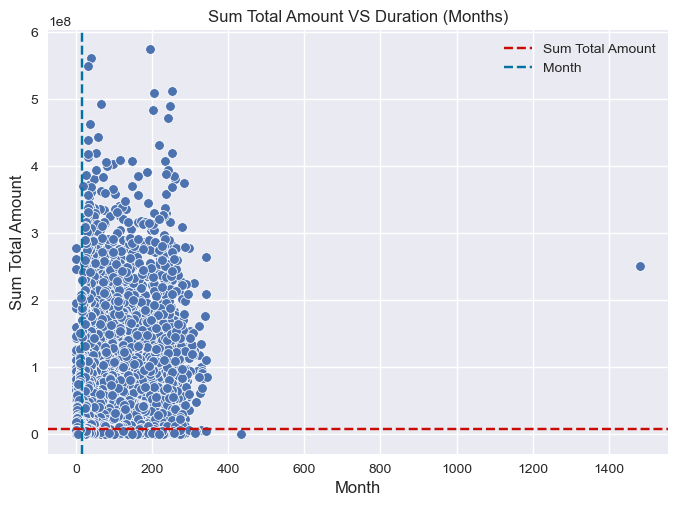

In [75]:
plt.style.use('seaborn-v0_8')

amountvsyr(df)

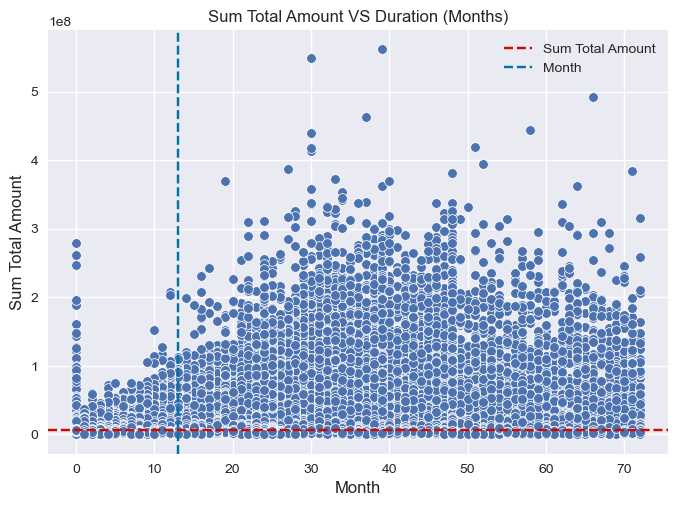

In [76]:
q_low = df['mem_duration(months)'].quantile(0.01)
q_hi  = df['mem_duration(months)'].quantile(0.99)

df2 = df[(df['mem_duration(months)'] > q_hi)] # Outliers
df = df[(df['mem_duration(months)'] <= q_hi)]

amountvsyr(df)

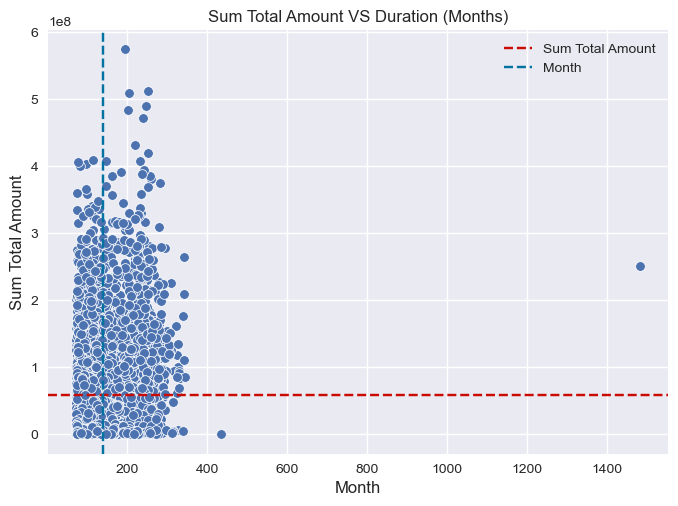

In [77]:
amountvsyr(df2) # Outliers

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575031 entries, 0 to 580823
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ent                    575031 non-null  object 
 1   mem_duration(months)   575031 non-null  float64
 2   total_amount           575031 non-null  float64
 3   total_last_3m          575031 non-null  float64
 4   total_last_6m          575031 non-null  float64
 5   total_online           575031 non-null  float64
 6   total_last_3m_online   575031 non-null  float64
 7   total_last_6m_online   575031 non-null  float64
 8   total_offline          575031 non-null  float64
 9   total_last_3m_offline  575031 non-null  float64
 10  total_last_6m_offline  575031 non-null  float64
 11  total_network          575031 non-null  float64
 12  network_last_3m        575031 non-null  float64
 13  network_last_6m        575031 non-null  float64
 14  total_transaction      575031 non-nu

# STEP 2
- Prepare DATA
- Selecting clustering samples.

In [79]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

In [80]:
# Prepare data for an Elbow Visualization & Clustering

dfk = df.drop(columns=['ent']).reset_index(drop=True)
dfk_outler = df2.drop(columns=['ent']).reset_index(drop=True)

bfc = Pipeline(
    steps=[("normalization", MinMaxScaler()),
           ('PCA',PCA(n_components=2, random_state=42))
           ])

dfk = bfc.fit_transform(dfk)
dfk_outler = bfc.fit_transform(dfk_outler)

dfk = pd.DataFrame(dfk)
dfk_outler = pd.DataFrame(dfk_outler)

display(dfk)

,0,1
0,-0.181952,-0.002266
1,-0.184689,-0.001439
2,0.437269,0.020537
3,-0.188284,-0.012730
4,-0.188921,-0.013172
...,...,...
575026,-0.152298,0.257082
575027,-0.152298,0.257082
575028,-0.152298,0.257082
575029,-0.164413,0.071909


K-Elbow Method

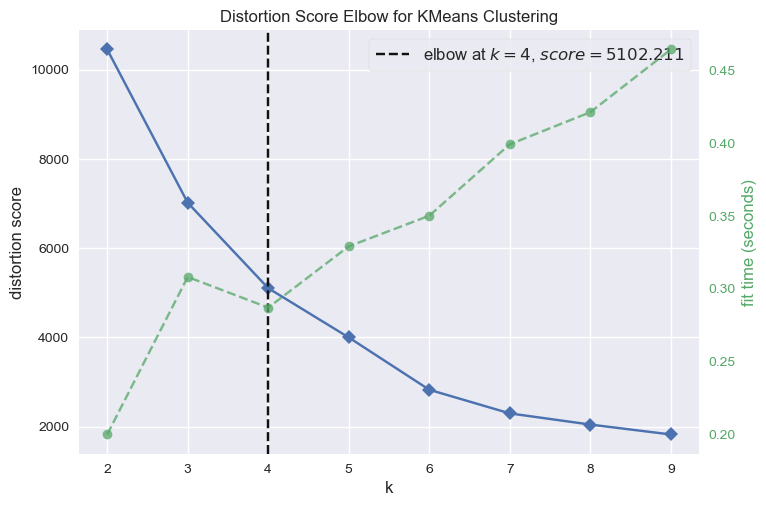

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [81]:
km = KMeans(n_init='auto')

visualizer = KElbowVisualizer(km, k=(2,10))
visualizer.fit(dfk)
visualizer.show() 

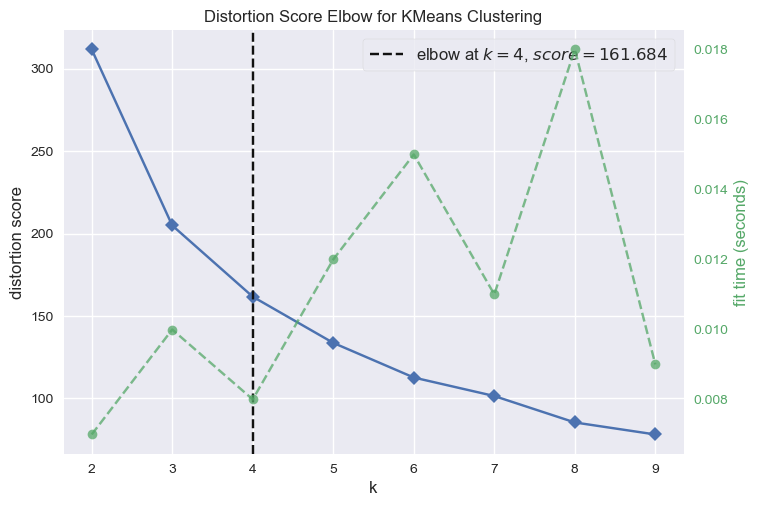

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [82]:
# Outliers

km = KMeans(n_init='auto')

visualizer = KElbowVisualizer(km, k=(2,10))
visualizer.fit(dfk_outler)
visualizer.show() 

Silhouette Method

In [40]:
# from sklearn.metrics import silhouette_score

# for k in range(2, 6):
#     # Create a KMeans object and fit the data
#     kmeans = KMeans(n_clusters=k, random_state=0)
#     kmeans.fit(dfk)

#     # Get the cluster labels for each sample
#     labels = kmeans.labels_

#     # Calculate silhouette score
#     silhouette_avg = silhouette_score(dfk, labels)

#     # Print the silhouette score
#     print(f"Silhouette Score k={k} : {silhouette_avg}" )

In [ ]:
# # Outliers

# for k in range(2, 6):
#     # Create a KMeans object and fit the data
#     kmeans = KMeans(n_clusters=k, random_state=0)
#     kmeans.fit(dfk_outler)

#     # Get the cluster labels for each sample
#     labels = kmeans.labels_

#     # Calculate silhouette score
#     silhouette_avg = silhouette_score(dfk_outler, labels)

#     # Print the silhouette score
#     print(f"Silhouette Score k={k} : {silhouette_avg}" )

# RESULTS

- KMeans

In [84]:
cl = KMeans(n_clusters=4, random_state=0)

df['cluster'] = cl.fit(dfk).labels_
df

C:\Users\rastu\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rastu\AppData\Local\Temp\ipykernel_10092\4008010308.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cl.fit(dfk).labels_


,ent,mem_duration(months),total_amount,total_last_3m,total_last_6m,total_online,total_last_3m_online,total_last_6m_online,total_offline,total_last_3m_offline,...,total_transaction,transaction_last3m,transaction_last6m,sku_penetrate(%),sku_last3m,sku_last6m,ticket_size,ticket_size_3m,ticket_size_6m,cluster
0,TCC43RQQZ3B,0.0,3664000.0,0.0,0.0,3254000.0,0.0,0.0,410000.0,0.0,...,2,0.0,0.0,0.005,0.000,0.000,1221333.333,0.000,0.000,0
1,TCC4Q4JZ4Q0,0.0,1389500.0,0.0,0.0,1387000.0,0.0,0.0,2500.0,0.0,...,3,0.0,0.0,0.007,0.000,0.000,277900.000,0.000,0.000,0
2,TCC4RJ11QE7,43.0,55466000.0,0.0,1005000.0,51856000.0,0.0,1005000.0,3610000.0,0.0,...,23,0.0,1.0,0.032,0.000,0.002,880412.698,0.000,335000.000,2
3,TCC434QRCJY,0.0,341000.0,0.0,0.0,341000.0,0.0,0.0,0.0,0.0,...,1,0.0,0.0,0.002,0.000,0.000,341000.000,0.000,0.000,0
4,TCC43RRCE10,0.0,189000.0,0.0,0.0,189000.0,0.0,0.0,0.0,0.0,...,1,0.0,0.0,0.002,0.000,0.000,189000.000,0.000,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580819,TCCEQ1Z1QC7,0.0,6152000.0,6152000.0,6152000.0,0.0,0.0,0.0,6152000.0,6152000.0,...,1,1.0,1.0,0.007,0.007,0.007,1025333.333,1025333.333,1025333.333,0
580820,TCCEQ1Z1QEF,0.0,6152000.0,6152000.0,6152000.0,0.0,0.0,0.0,6152000.0,6152000.0,...,1,1.0,1.0,0.007,0.007,0.007,1025333.333,1025333.333,1025333.333,0
580821,TCCEQ1Z1QW0,0.0,6152000.0,6152000.0,6152000.0,0.0,0.0,0.0,6152000.0,6152000.0,...,1,1.0,1.0,0.007,0.007,0.007,1025333.333,1025333.333,1025333.333,0
580822,TCCEQ1Q1CE7,1.0,498000.0,498000.0,498000.0,498000.0,498000.0,498000.0,0.0,0.0,...,1,1.0,1.0,0.002,0.002,0.002,498000.000,498000.000,498000.000,0


In [86]:
# Outliers

cl = KMeans(n_clusters=4, random_state=0)

df2['cluster'] = cl.fit(dfk_outler).labels_
df2

C:\Users\rastu\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rastu\AppData\Local\Temp\ipykernel_10092\628646006.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cluster'] = cl.fit(dfk_outler).labels_


,ent,mem_duration(months),total_amount,total_last_3m,total_last_6m,total_online,total_last_3m_online,total_last_6m_online,total_offline,total_last_3m_offline,...,total_transaction,transaction_last3m,transaction_last6m,sku_penetrate(%),sku_last3m,sku_last6m,ticket_size,ticket_size_3m,ticket_size_6m,cluster
53,TZEEQRRU,128.0,61098000.0,237000.0,1752000.0,36675000.0,0.0,1015000.0,24423000.0,237000.0,...,57,3.0,9.0,0.050,0.004,0.012,481086.614,79000.000,146000.000,3
139,TCC4CEQ1CRP,85.0,40683000.0,6420000.0,8953000.0,38800000.0,6420000.0,8953000.0,1883000.0,0.0,...,28,2.0,4.0,0.048,0.009,0.012,589608.696,917142.857,813909.091,3
167,TCC44C1W3Z0,90.0,21454500.0,239000.0,807000.0,10214000.0,239000.0,239000.0,11240500.0,0.0,...,25,1.0,3.0,0.030,0.002,0.004,650136.364,239000.000,269000.000,0
176,TCC44JWJ332,76.0,29657000.0,4947000.0,15335000.0,23535000.0,4908000.0,14473000.0,6122000.0,39000.0,...,24,3.0,5.0,0.041,0.012,0.021,723341.463,706714.286,1179615.385,3
181,TCC4C4C1E4P,110.0,199222500.0,1575000.0,23498000.0,124326500.0,1575000.0,10062000.0,74896000.0,0.0,...,77,2.0,13.0,0.105,0.005,0.032,1011281.726,525000.000,652722.222,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573507,UCC4EQ1U,100.0,149000.0,149000.0,149000.0,0.0,0.0,0.0,149000.0,149000.0,...,1,1.0,1.0,0.002,0.002,0.002,149000.000,149000.000,149000.000,0
573816,T3R43W40,148.0,1218000.0,1218000.0,1218000.0,0.0,0.0,0.0,1218000.0,1218000.0,...,2,2.0,2.0,0.002,0.002,0.002,609000.000,609000.000,609000.000,0
575796,TCC44QEEE40,75.0,1218000.0,1218000.0,1218000.0,0.0,0.0,0.0,1218000.0,1218000.0,...,1,1.0,1.0,0.002,0.002,0.002,609000.000,609000.000,609000.000,0
577873,TJC1C44Y,85.0,1716000.0,1716000.0,1716000.0,0.0,0.0,0.0,1716000.0,1716000.0,...,1,1.0,1.0,0.004,0.004,0.004,858000.000,858000.000,858000.000,3


In [87]:
# df.to_csv('D:\DATA_Science\GitHub\BeforeGIT\week05_segment_result.csv')
# dfk_outler.to_csv('D:\DATA_Science\GitHub\BeforeGIT\week05_outlier_result.csv')

- Feature Importance

Feature: 0, Score: 0.94208
Feature: 1, Score: 0.00256
Feature: 2, Score: 0.01835
Feature: 3, Score: 0.00150
Feature: 4, Score: 0.00012
Feature: 5, Score: 0.00036
Feature: 6, Score: 0.00035
Feature: 7, Score: 0.00015
Feature: 8, Score: 0.00012
Feature: 9, Score: 0.00011
Feature: 10, Score: 0.00012
Feature: 11, Score: 0.00019
Feature: 12, Score: 0.00013
Feature: 13, Score: 0.00016
Feature: 14, Score: 0.00015
Feature: 15, Score: 0.00014
Feature: 16, Score: 0.00363
Feature: 17, Score: 0.00556
Feature: 18, Score: 0.02150
Feature: 19, Score: 0.00049
Feature: 20, Score: 0.00115
Feature: 21, Score: 0.00108


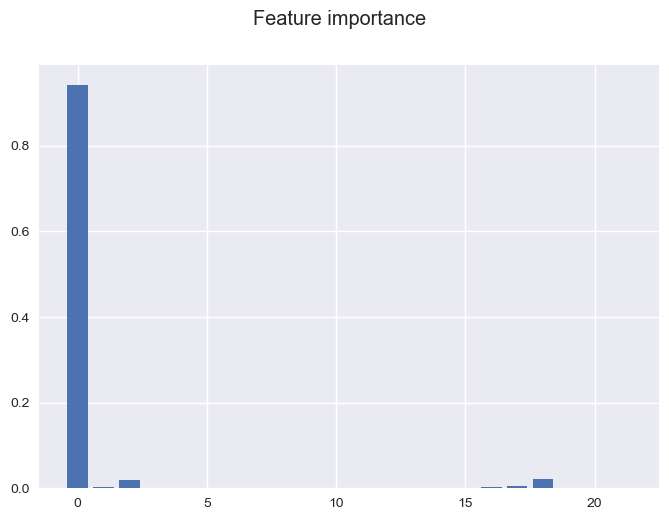

In [98]:
# decision tree for feature importance on a regression problem
from sklearn.tree import DecisionTreeRegressor

# define dataset
X = df.drop(columns=['ent','cluster'])
y = df['cluster']

# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.suptitle("Feature importance")
plt.show()

In [89]:
print(f"Feature columns : {X.columns[0]} , {X.columns[18]}")


Feature columns : mem_duration(months) , sku_last6m


Feature: 0, Score: 0.00482
Feature: 1, Score: 0.13266
Feature: 2, Score: 0.05758
Feature: 3, Score: 0.52137
Feature: 4, Score: 0.00431
Feature: 5, Score: 0.00221
Feature: 6, Score: 0.00115
Feature: 7, Score: 0.00655
Feature: 8, Score: 0.00271
Feature: 9, Score: 0.00198
Feature: 10, Score: 0.00597
Feature: 11, Score: 0.00531
Feature: 12, Score: 0.00407
Feature: 13, Score: 0.00123
Feature: 14, Score: 0.00282
Feature: 15, Score: 0.00830
Feature: 16, Score: 0.06862
Feature: 17, Score: 0.01316
Feature: 18, Score: 0.02540
Feature: 19, Score: 0.01564
Feature: 20, Score: 0.09563
Feature: 21, Score: 0.01850


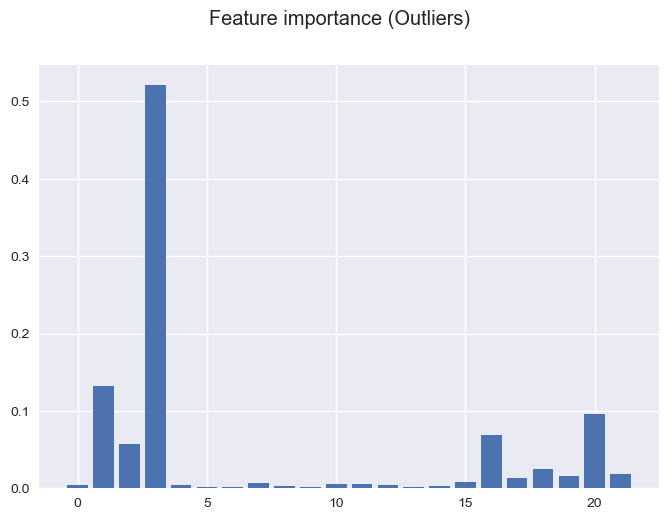

In [97]:
# Outliers

# define dataset
X = df2.drop(columns=['ent','cluster'])
y = df2['cluster']

# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.suptitle("Feature importance (Outliers)")
plt.show()

In [91]:
print(f"Feature columns (Outliers) : {X.columns[1]} , {X.columns[3]}")

Feature columns (Outliers) : total_amount , total_last_6m


PLOT (KMeans)

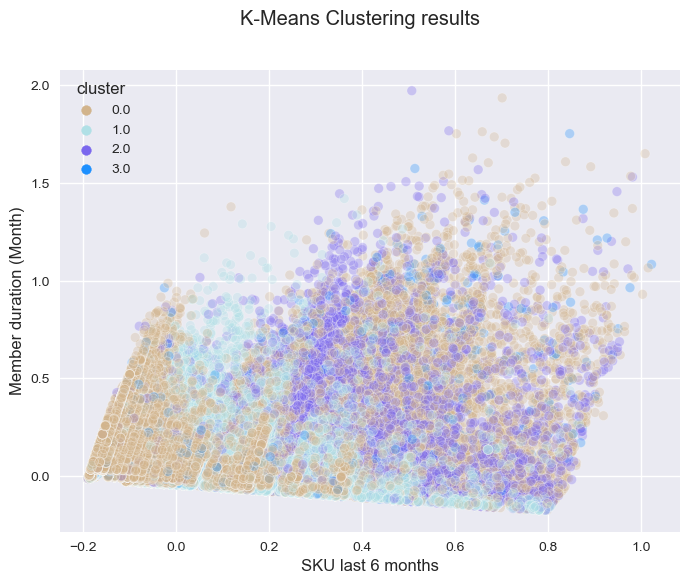

In [99]:
# Getting unique labels
 
dfk['cluster'] = df['cluster']
 
# plotting the results:
 
plt.style.use('seaborn-v0_8')

fig, axe = plt.subplots(figsize=(8,6))

color_dict = dict({0:'#D2B48C', 1:'#B0E0E6',
                  2: '#7B68EE',3: '#1E90FF',4: '#9FE2BF'})

g = sns.scatterplot(data = dfk , x=0, y=1, hue="cluster", ax=axe ,alpha=0.3, palette=color_dict)
axe.set(xlabel='SKU last 6 months', ylabel='Member duration (Month)')
fig.suptitle("K-Means Clustering results")
plt.show()

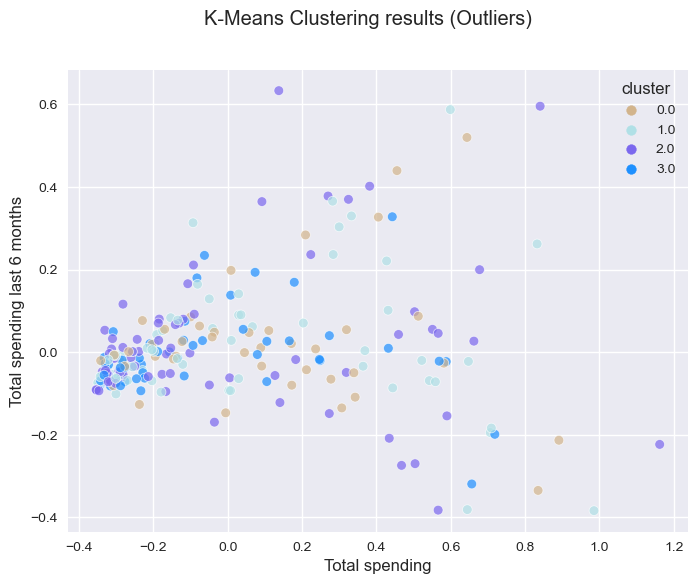

In [94]:
# Getting unique labels
 
dfk_outler['cluster'] = df2['cluster']
 
# plotting the results:
 
plt.style.use('seaborn-v0_8')

fig, axe = plt.subplots(figsize=(8,6))

color_dict = dict({0:'#D2B48C', 1:'#B0E0E6',
                  2: '#7B68EE',3: '#1E90FF',4: '#9FE2BF'})

g = sns.scatterplot(data = dfk_outler , x=0, y=1, hue="cluster", ax=axe ,alpha=0.7, palette=color_dict)
axe.set(xlabel='Total spending', ylabel='Total spending last 6 months')
fig.suptitle("K-Means Clustering results (Outliers)")
plt.show()